<a href="https://colab.research.google.com/github/PravinTiwari023/100-days-of-machine-learning/blob/main/Handling_Imbalance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Imbalance Data**

- Up Sampling
- Down Sampling

# **Up Sampling**

In [ ]:
import numpy as np
import pandas as pd

# Creating Datapoint
np.random.seed(123)

n_samples = 1000

class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

n_class_0, n_class_1

(900, 100)

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [ ]:
# up sampling
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


# **Down Sampling**

In [ ]:
import numpy as np
import pandas as pd

# Creating Datapoint
np.random.seed(123)

n_samples = 1000

class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
# down sampling
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [ ]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [ ]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

df_downsampled['target'].value_counts()

,count
target,
1,100
0,100


# **SMOTE (Synthetic Minority OverSampling Technique)**

In [ ]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=42)

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

df.head()

,feature_1,feature_2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [ ]:
df['target'].value_counts()

,count
target,
0,896
1,104


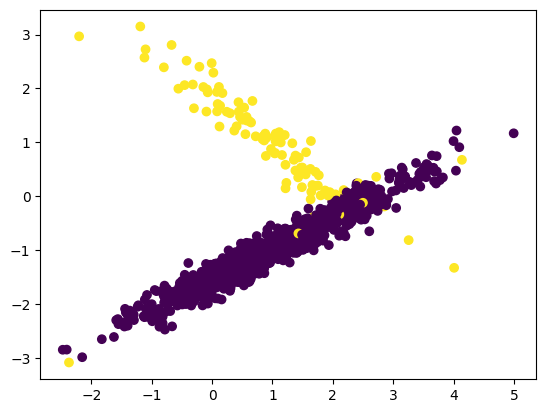

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'])
plt.show()

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')

X_resampled, y_resampled = oversample.fit_resample(df[['feature_1','feature_2']], df['target'])

In [ ]:
X_resampled.shape, y_resampled.shape

((1792, 2), (1792,))

In [ ]:
oversampled_df = pd.concat([X_resampled, y_resampled], axis=1)

oversampled_df.shape

(1792, 3)

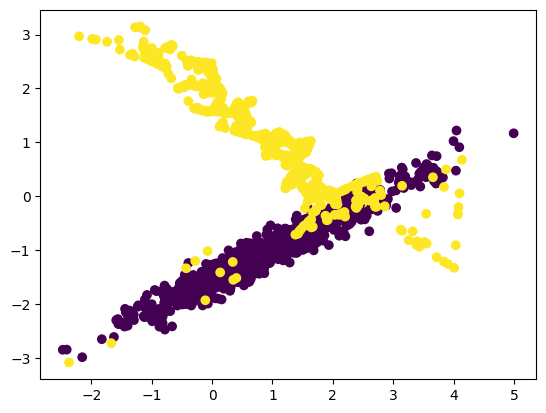

In [ ]:
plt.scatter(x=oversampled_df['feature_1'], y=oversampled_df['feature_2'], c=oversampled_df['target'])
plt.show()

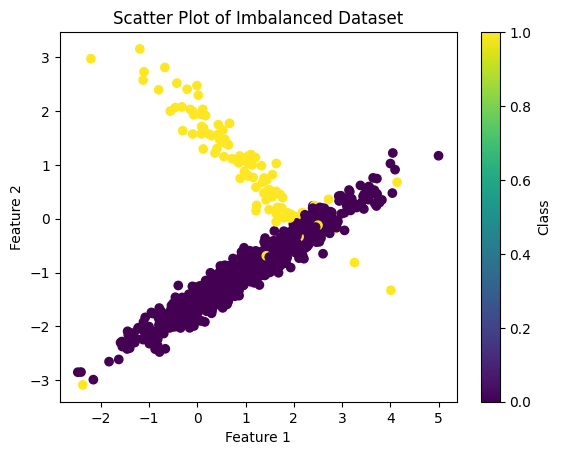

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset with imbalanced classes
X, y = make_classification(
    n_samples=1000,
    n_redundant=0,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=42
)

# Create a DataFrame to organize features and target
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

# Visualize the dataset
plt.scatter(
    x=df['feature_1'],
    y=df['feature_2'],
    c=df['target'],
    cmap='viridis'              # Add a colormap for better visualization
)
plt.title("Scatter Plot of Imbalanced Dataset")  # Add a title for clarity
plt.xlabel("Feature 1")                          # Label for X-axis
plt.ylabel("Feature 2")                          # Label for Y-axis
plt.colorbar(label="Class")                      # Add color legend
plt.show()